In [ ]:
import tensorflow as tf
print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available: 1


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile
import os

zip_path = "/content/drive/My Drive/Colab Notebooks/plant_village_.zip"  # Update this if needed
extract_path = "/content/plantvillage dataset"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Dataset extracted successfully!")

Dataset extracted successfully!


In [ ]:
import os

# Check what's inside the "plantvillage dataset" folder
print(os.listdir("/content/plantvillage dataset/plantvillage dataset"))

['segmented', 'color', 'grayscale']


In [ ]:
dataset_path = "/content/plantvillage dataset/plantvillage dataset"
color_path = os.path.join(dataset_path, "color")
grayscale_path = os.path.join(dataset_path, "grayscale")
segmented_path = os.path.join(dataset_path, "segmented")

print("Corrected dataset path:", dataset_path)
print("Folders inside:", os.listdir(dataset_path))


Corrected dataset path: /content/plantvillage dataset/plantvillage dataset
Folders inside: ['segmented', 'color', 'grayscale']


In [ ]:
import shutil

source = "/content/plantvillage dataset/plantvillage dataset"
destination = "/content/plantvillage dataset"

# Move all files and folders
for item in os.listdir(source):
    shutil.move(os.path.join(source, item), destination)

# Remove the extra folder
os.rmdir(source)

print("Dataset structure fixed!")
print(os.listdir("/content/plantvillage dataset"))

Dataset structure fixed!
['segmented', 'color', 'grayscale']


check the dataset structure below

In [ ]:
import os

dataset_path = "/content/plantvillage dataset"

# List the main folders inside the dataset
print("Dataset folders:", os.listdir(dataset_path))

# Check inside 'color' folder (or any category folder)
color_path = os.path.join(dataset_path, "color")
if os.path.exists(color_path):
    print("Categories in 'color':", os.listdir(color_path))


Dataset folders: ['segmented', 'color', 'grayscale']
Categories in 'color': ['Grape___Esca_(Black_Measles)', 'Tomato___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Peach___healthy', 'Potato___healthy', 'Corn_(maize)___Common_rust_', 'Pepper,_bell___healthy', 'Strawberry___healthy', 'Potato___Early_blight', 'Pepper,_bell___Bacterial_spot', 'Tomato___Target_Spot', 'Squash___Powdery_mildew', 'Tomato___Septoria_leaf_spot', 'Blueberry___healthy', 'Tomato___Bacterial_spot', 'Cherry_(including_sour)___Powdery_mildew', 'Tomato___Late_blight', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Raspberry___healthy', 'Tomato___Tomato_mosaic_virus', 'Apple___Black_rot', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Apple___Apple_scab', 'Corn_(maize)___healthy', 'Cherry_(including_sour)___healthy', 'Strawberry___Leaf_scorch', 'Grape___healthy', 'Tomato___Early_blight', 'Tomato___Leaf_Mold', 'Corn_(maize)___Northern_Leaf_Blight', 'Potato_

convert images into grayscale

In [ ]:
import cv2
import os
import numpy as np

# Define the path to the grayscale images
grayscale_path = "/content/plantvillage dataset/grayscale"

# List to store any non-grayscale images found
non_grayscale_images = []

# Iterate through categories (subfolders)
for category in os.listdir(grayscale_path):
    category_path = os.path.join(grayscale_path, category)

    # Check if it's a directory
    if not os.path.isdir(category_path):
        continue

    for img_name in os.listdir(category_path):
        img_path = os.path.join(category_path, img_name)
        img = cv2.imread(img_path)

        if img is None:
            print(f"Error loading image: {img_path}")
            continue

        # Check if the image is grayscale by verifying single-channel or equal RGB values
        if len(img.shape) == 3 and not np.all(img[..., 0] == img[..., 1]) and not np.all(img[..., 1] == img[..., 2]):
            non_grayscale_images.append(img_path)

print("Verification complete!")
if non_grayscale_images:
    print(f"Warning: Found {len(non_grayscale_images)} non-grayscale images.")
    for img in non_grayscale_images:
        print(img)
else:
    print("All images are properly in grayscale format.")


Verification complete!
All images are properly in grayscale format.


show images

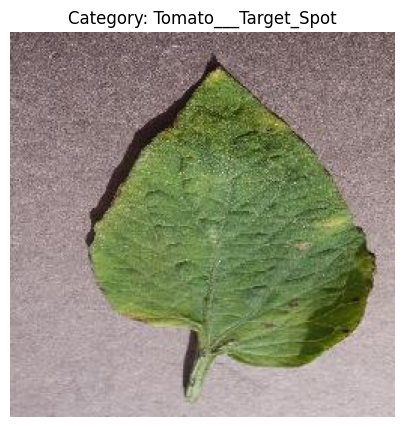

In [ ]:
import matplotlib.pyplot as plt
import cv2
import random

# Define dataset path
dataset_path = "/content/plantvillage dataset"
color_path = os.path.join(dataset_path, "color")

# Pick a random category (disease type)
categories = os.listdir(color_path)
random_category = random.choice(categories)
category_path = os.path.join(color_path, random_category)

# Pick a random image from that category
random_image = random.choice(os.listdir(category_path))
image_path = os.path.join(category_path, random_image)

# Load and display the image
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR (OpenCV) to RGB (Matplotlib)

plt.figure(figsize=(5, 5))
plt.imshow(img)
plt.title(f"Category: {random_category}")
plt.axis("off")
plt.show()


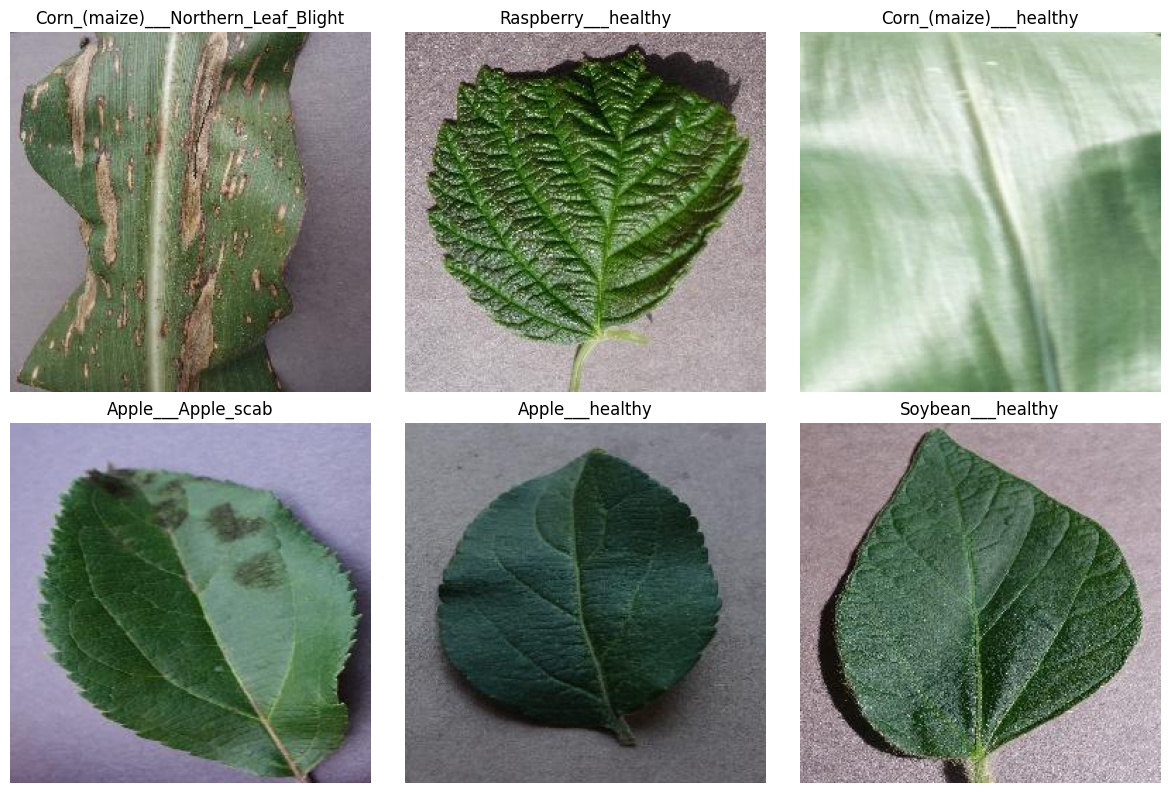

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(12, 8))  # 2 rows, 3 columns

for ax in axes.flat:
    random_category = random.choice(categories)
    category_path = os.path.join(color_path, random_category)
    random_image = random.choice(os.listdir(category_path))
    image_path = os.path.join(category_path, random_image)

    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    ax.imshow(img)
    ax.set_title(random_category)
    ax.axis("off")

plt.tight_layout()
plt.show()


resize

In [ ]:
image_size = (128, 128)

def resize_images(source_dir, target_dir):
    os.makedirs(target_dir, exist_ok=True)

    for category in os.listdir(source_dir):
        os.makedirs(os.path.join(target_dir, category), exist_ok=True)

        for img_name in os.listdir(os.path.join(source_dir, category)):
            img = cv2.imread(os.path.join(source_dir, category, img_name))
            img = cv2.resize(img, image_size)
            cv2.imwrite(os.path.join(target_dir, category, img_name), img)

resize_images(color_path, "/content/plantvillage dataset/color_resized")
resize_images(grayscale_path, "/content/plantvillage dataset/grayscale_resized")

print("Images resized successfully!")


Images resized successfully!


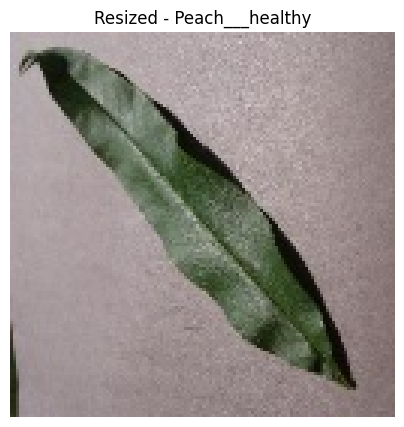

In [ ]:
import matplotlib.pyplot as plt
import cv2
import random
import os

# Define resized dataset path
resized_path = "/content/plantvillage dataset/color_resized"

# Pick a random category (disease type)
categories = os.listdir(resized_path)
random_category = random.choice(categories)
category_path = os.path.join(resized_path, random_category)

# Pick a random image from that category
random_image = random.choice(os.listdir(category_path))
image_path = os.path.join(category_path, random_image)

# Load and display the image
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

plt.figure(figsize=(5, 5))
plt.imshow(img)
plt.title(f"Resized - {random_category}")
plt.axis("off")
plt.show()


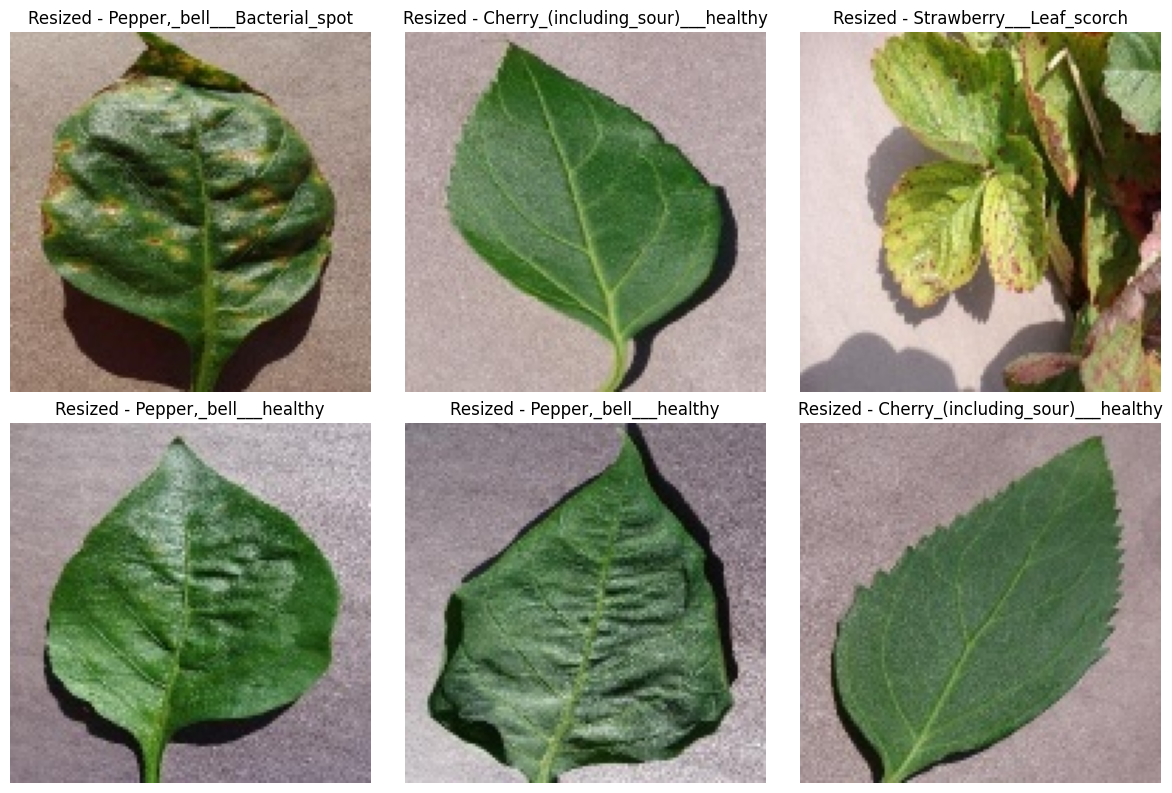

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(12, 8))  # 2 rows, 3 columns

for ax in axes.flat:
    random_category = random.choice(categories)
    category_path = os.path.join(resized_path, random_category)
    random_image = random.choice(os.listdir(category_path))
    image_path = os.path.join(category_path, random_image)

    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    ax.imshow(img)
    ax.set_title(f"Resized - {random_category}")
    ax.axis("off")

plt.tight_layout()
plt.show()


splitting the data into traing and test

In [ ]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Paths
dataset_path = "/content/plantvillage dataset/color_resized"
train_path = "/content/plantvillage dataset/train"
test_path = "/content/plantvillage dataset/test"

# Create directories for train and test sets
os.makedirs(train_path, exist_ok=True)
os.makedirs(test_path, exist_ok=True)

# Loop through categories and split images
for category in os.listdir(dataset_path):
    category_path = os.path.join(dataset_path, category)
    train_category_path = os.path.join(train_path, category)
    test_category_path = os.path.join(test_path, category)

    os.makedirs(train_category_path, exist_ok=True)
    os.makedirs(test_category_path, exist_ok=True)

    # Get all image paths in the category
    image_paths = [os.path.join(category_path, img) for img in os.listdir(category_path)]

    # Split the dataset (80% train, 20% test)
    train_files, test_files = train_test_split(image_paths, test_size=0.2, random_state=42)

    # Move images to the respective directories
    for train_file in train_files:
        shutil.move(train_file, os.path.join(train_category_path, os.path.basename(train_file)))
    for test_file in test_files:
        shutil.move(test_file, os.path.join(test_category_path, os.path.basename(test_file)))

print("Dataset split into training and testing sets successfully!")


Dataset split into training and testing sets successfully!


real augmentation

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest"
)

# No augmentation for test set, only rescaling
test_datagen = ImageDataGenerator(rescale=1./255)

# Load training and testing data
train_generator = train_datagen.flow_from_directory(
    "/content/plantvillage dataset/train",
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    "/content/plantvillage dataset/test",
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

print("Real-Time Augmentation Ready!")


Found 43429 images belonging to 38 classes.
Found 10876 images belonging to 38 classes.
Real-Time Augmentation Ready!


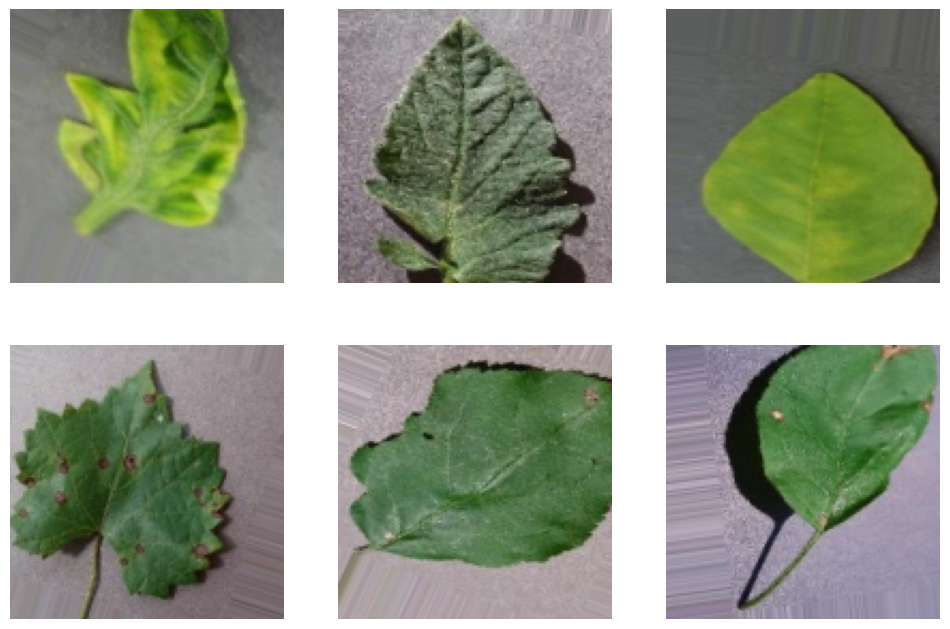

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Get one batch of images
images, labels = next(train_generator)

# Show 6 augmented images
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
for i, ax in enumerate(axes.flat):
    ax.imshow(images[i])
    ax.axis("off")

plt.show()


#vgg pre-trained model

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16

# Load the VGG16 model
model = VGG16(weights='imagenet', include_top=True)

# Summary of the model
model.summary()

553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc1 (Dense)                          │ (None, 4096)                │     102,764,544 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

modify the model

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Paths for the dataset
train_path = "/content/plantvillage dataset/train"
test_path = "/content/plantvillage dataset/test"

# Data generators for training and validation
train_datagen = ImageDataGenerator(rescale=1.0/255)
test_datagen = ImageDataGenerator(rescale=1.0/255)

# Loading training and testing data
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

# Get the number of classes from the training generator
num_classes = train_generator.num_classes

# Load the pretrained VGG16 model WITHOUT the top layer
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Freeze the convolutional base
for layer in base_model.layers:
    layer.trainable = False  # Prevent training the base model

# Add custom layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Better than Flatten() for reducing parameters
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)  # Prevent overfitting
x = Dense(256, activation='relu')(x)
x = Dropout(0.3)(x)

# Output layer for classification
output_layer = Dense(num_classes, activation='softmax')(x)

# Create the final model
model = Model(inputs=base_model.input, outputs=output_layer)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()

Found 43429 images belonging to 38 classes.
Found 10876 images belonging to 38 classes.
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 128, 128, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 128, 128, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 64, 64, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 64, 64, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 32, 32, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 32, 32, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 32, 32, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 16, 16, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 16, 16, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 8, 8, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         262,6

 Total params: 15,118,438 (57.67 MB)

 Trainable params: 403,750 (1.54 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

# compile the model

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_generator, epochs=20, validation_data=test_generator)


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1358/1358 ━━━━━━━━━━━━━━━━━━━━ 126s 86ms/step - accuracy: 0.2717 - loss: 2.8534 - val_accuracy: 0.6501 - val_loss: 1.3213
Epoch 2/20
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 110s 81ms/step - accuracy: 0.5923 - loss: 1.4099 - val_accuracy: 0.7644 - val_loss: 0.8457
Epoch 3/20
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 110s 81ms/step - accuracy: 0.6890 - loss: 1.0240 - val_accuracy: 0.8017 - val_loss: 0.6719
Epoch 4/20
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 110s 81ms/step - accuracy: 0.7370 - loss: 0.8497 - val_accuracy: 0.8284 - val_loss: 0.5745
Epoch 5/20
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 162s 96ms/step - accuracy: 0.7646 - loss: 0.7465 - val_accuracy: 0.8436 - val_loss: 0.5090
Epoch 6/20
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 110s 81ms/step - accuracy: 0.7862 - loss: 0.6703 - val_accuracy: 0.8530 - val_loss: 0.4695
Epoch 7/20
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 142s 81ms/step - accuracy: 0.8017 - loss: 0.6149 - val_accuracy: 0.8590 - val_loss: 0.4411
Epoch 8/20
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 110s 81ms/step - accuracy: 0.8205 - lo

In [ ]:
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc * 100:.2f}%")


340/340 ━━━━━━━━━━━━━━━━━━━━ 22s 64ms/step - accuracy: 0.9081 - loss: 0.2783
Test Accuracy: 90.53%


In [ ]:
model.save("omni_plant_model.h5")
print("Model saved successfully!")


Model saved successfully!


In [ ]:
model.save("omni_plant_model.keras")
print("Model saved in Keras format successfully!")


Model saved in Keras format successfully!


# load the model

In [ ]:
# Load the trained model
model = tf.keras.models.load_model("omni_plant_model.keras", compile=False)

# Recompile the model if necessary (optional)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

print("✅ Model loaded successfully!")


✅ Model loaded successfully!


# use model to make predictions

In [ ]:
import os

# List all images in the test directory (example path)
test_images = os.listdir("/content/plantvillage dataset/test")

# Display a few image file names
print(test_images[:5])  # Display first 5 images


['Grape___healthy', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Strawberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Tomato___Early_blight']


In [ ]:
import os

# Define the test directory
test_dir = "/content/plantvillage dataset/test"

# List all subdirectories (categories)
categories = os.listdir(test_dir)

# Loop through categories and list images
image_files = []
for category in categories:
    category_path = os.path.join(test_dir, category)

    # Ensure it's a directory and list all image files
    if os.path.isdir(category_path):
        for img_file in os.listdir(category_path):
            image_files.append(os.path.join(category_path, img_file))

# Display first few image file paths
print(image_files[:5])  # Display first 5 image paths


['/content/plantvillage dataset/test/Grape___healthy/9268b279-6e48-45ec-98b9-58475d9466e8___Mt.N.V_HL 9132.JPG', '/content/plantvillage dataset/test/Grape___healthy/8e026e59-ea04-4f21-832c-b7c4539dfe91___Mt.N.V_HL 6096.JPG', '/content/plantvillage dataset/test/Grape___healthy/5cb0aff8-6889-46d4-b283-da8f77761523___Mt.N.V_HL 8909.JPG', '/content/plantvillage dataset/test/Grape___healthy/9733dad1-a4ce-43a5-a166-70dd361df8e3___Mt.N.V_HL 8963.JPG', '/content/plantvillage dataset/test/Grape___healthy/ddcf9afc-8a06-4778-8eba-95f8efe65be3___Mt.N.V_HL 6201.JPG']


In [ ]:

import numpy as np
import os
import random
from tensorflow.keras.preprocessing import image

# Define the path to the test dataset
test_path = "/content/plantvillage dataset/test"

# Get a random class folder from the test dataset
class_folders = os.listdir(test_path)
random_class = random.choice(class_folders)  # Pick a random class
class_path = os.path.join(test_path, random_class)

# Get a random image file from the selected class
image_files = [f for f in os.listdir(class_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
if not image_files:
    print("No images found in the selected test class folder.")
else:
    img_path = os.path.join(class_path, random.choice(image_files))  # Pick a random image
    print(f"🔍 Selected Image: {img_path}")

    # Load and preprocess the image
    img = image.load_img(img_path, target_size=(128, 128))  # Resize to match model input
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array /= 255.0  # Normalize to [0,1] range

    # Make a prediction
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions)

    # Get class labels from the training generator
    class_labels = list(train_generator.class_indices.keys())
    predicted_label = class_labels[predicted_class]

    print(f"✅ Predicted Disease: {predicted_label}")



🔍 Selected Image: /content/plantvillage dataset/test/Peach___Bacterial_spot/78457661-d9e5-4170-8d07-e80fe53ba581___Rutg._Bact.S 1593.JPG
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
✅ Predicted Disease: Peach___Bacterial_spot


# evaluate on entire test set

In [ ]:
# Evaluate the model on the test set using the test generator
test_loss, test_accuracy = model.evaluate(test_generator)

print(f"✅ Test Loss: {test_loss:.4f}")
print(f"✅ Test Accuracy: {test_accuracy * 100:.2f}%")


340/340 ━━━━━━━━━━━━━━━━━━━━ 24s 67ms/step - accuracy: 0.9083 - loss: 0.2783
✅ Test Loss: 0.2830
✅ Test Accuracy: 90.53%


#Visualize Model Predictions on Multiple Test Images

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 682ms/step


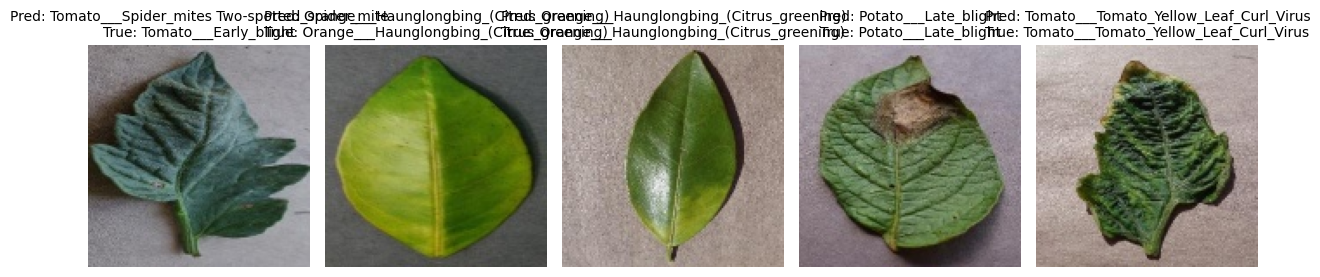

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Get class labels (mapping indices to class names)
class_labels = list(train_generator.class_indices.keys())

# Pick a batch of images from the test generator
test_images, test_labels = next(test_generator)  # Get a batch

# Make predictions
predictions = model.predict(test_images)

# Get predicted classes
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(test_labels, axis=1)  # True class indices

# Plot the first 5 images with predictions
plt.figure(figsize=(12, 6))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(test_images[i])  # Image is already normalized (0-1 range)
    plt.title(f"Pred: {class_labels[predicted_classes[i]]}\nTrue: {class_labels[true_classes[i]]}", fontsize=10)
    plt.axis('off')


plt.tight_layout()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


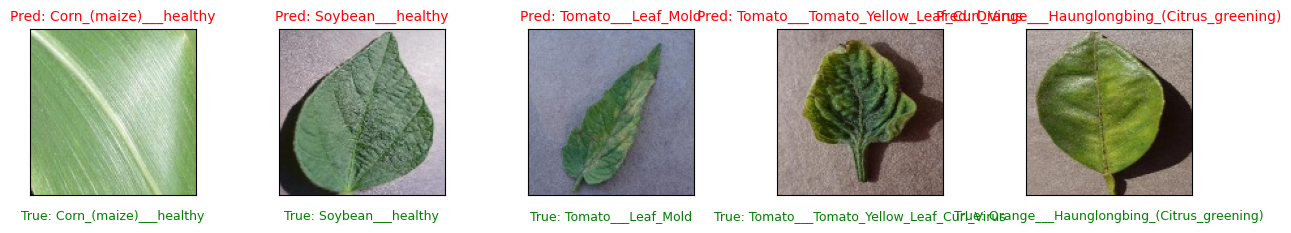

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Get class labels (mapping indices to class names)
class_labels = list(train_generator.class_indices.keys())

# Pick a batch of images from the test generator
test_images, test_labels = next(test_generator)  # Get a batch

# Make predictions
predictions = model.predict(test_images)

# Get predicted classes
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(test_labels, axis=1)  # True class indices

# Plot the first 5 images with predictions
fig, axes = plt.subplots(1, 5, figsize=(15, 6))  # Increased figure width

for i, ax in enumerate(axes):
    ax.imshow(test_images[i])  # Image is already normalized (0-1 range)
    ax.set_xticks([])  # Remove x-axis ticks
    ax.set_yticks([])  # Remove y-axis ticks

    # Display predicted label at the top
    ax.set_title(f"Pred: {class_labels[predicted_classes[i]]}", fontsize=10, color='red')

    # Display true label below the image using ax.text()
    ax.text(0.5, -0.15, f"True: {class_labels[true_classes[i]]}",
            fontsize=9, color='green', ha='center', transform=ax.transAxes)

plt.subplots_adjust(wspace=0.5)  # Add spacing between images to prevent overlap
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


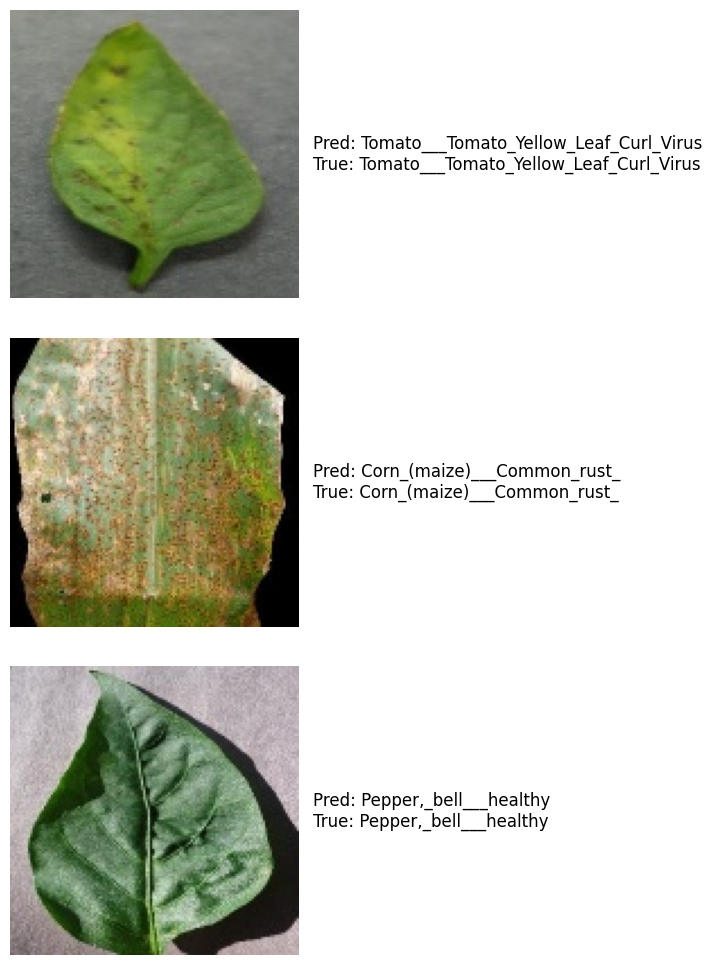

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Get class labels (mapping indices to class names)
class_labels = list(train_generator.class_indices.keys())

# Pick a batch of images from the test generator
test_images, test_labels = next(test_generator)  # Get a batch

# Make predictions
predictions = model.predict(test_images)

# Get predicted classes
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(test_labels, axis=1)  # True class indices

# Select only the first 3 images
num_images = 3

# Plot images in a column
fig, axes = plt.subplots(num_images, 1, figsize=(6, 10))  # Column layout

for i, ax in enumerate(axes):
    ax.imshow(test_images[i])  # Image is already normalized (0-1 range)
    ax.set_xticks([])  # Remove x-axis ticks
    ax.set_yticks([])  # Remove y-axis ticks
    ax.axis("off")  # Hide the axis frame

    # Write predicted and true labels next to the image
    ax.text(1.05, 0.5, f"Pred: {class_labels[predicted_classes[i]]}\nTrue: {class_labels[true_classes[i]]}",
            fontsize=12, color='black', ha='left', va='center', transform=ax.transAxes)

plt.tight_layout()
plt.show()


# save the final model

In [ ]:
# Save the model
model.save('final_omni_plant_model.keras')
print("✅ Model saved successfully!")


✅ Model saved successfully!


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 8 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 834ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━

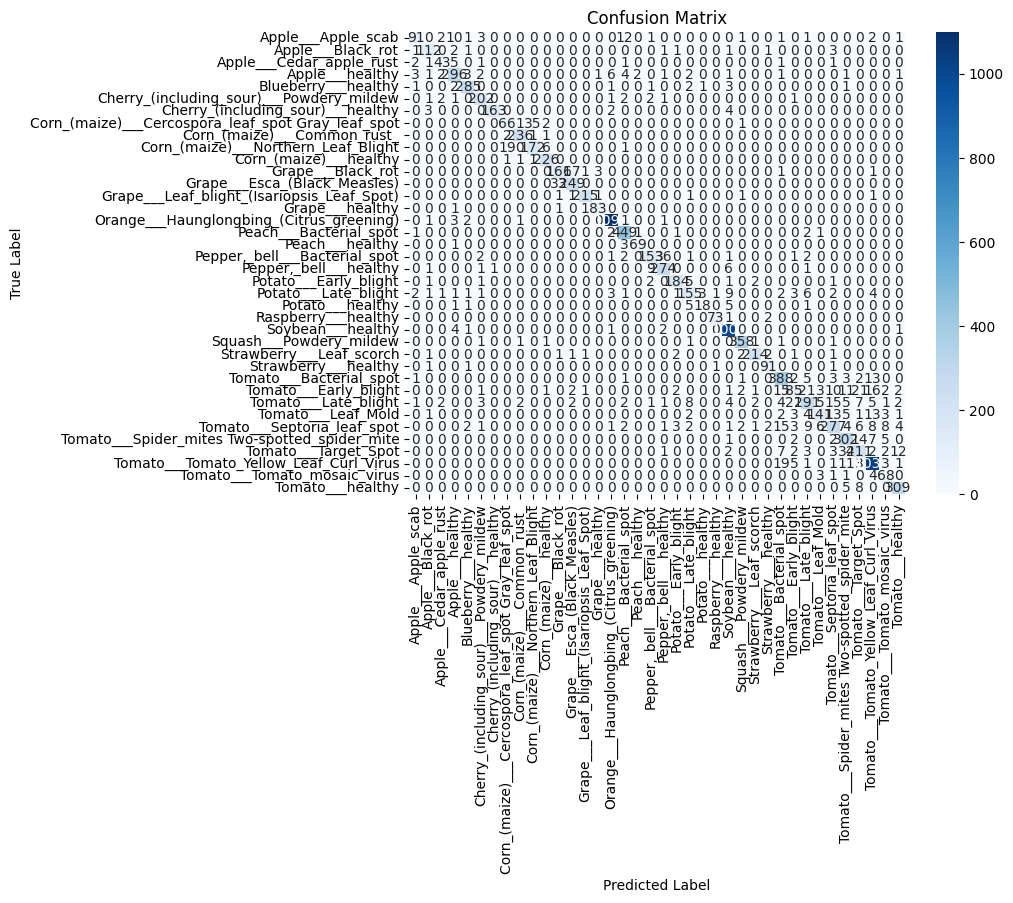

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

# Load the saved model
model = load_model("omni_plant_model.keras")

# Get class labels (mapping indices to class names)
class_labels = list(train_generator.class_indices.keys())

# Predict on the entire test dataset
y_true = []
y_pred = []

# Loop through test_generator to get all images and labels
for images, labels in test_generator:
    predictions = model.predict(images)

    # Convert one-hot encoded labels to class indices
    true_classes = np.argmax(labels, axis=1)
    predicted_classes = np.argmax(predictions, axis=1)

    y_true.extend(true_classes)
    y_pred.extend(predicted_classes)

    # Stop once all test images are processed
    if len(y_true) >= test_generator.samples:
        break

# Convert lists to numpy arrays
y_true = np.array(y_true)
y_pred = np.array(y_pred)

# Classification report
print("Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_labels))

# Compute F1-score, Recall, and Precision
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f"\nPrecision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


#restnet50

In [ ]:
from tensorflow.keras.applications import ResNet50

# Load the ResNet50 model
model = ResNet50(weights='imagenet', include_top=True)

# Summary of the model
model.summary()

102967424/102967424 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 230, 230, 3)    │              0 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 56, 56, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 56, 56, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 56, 56, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)             

 Total params: 25,636,712 (97.80 MB)

 Trainable params: 25,583,592 (97.59 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Paths for the dataset
train_path = "/content/plantvillage dataset/train"
test_path = "/content/plantvillage dataset/test"

# Number of classes (adjust this value based on your dataset)
num_classes = 38  # Replace with the actual number of classes in your dataset

# Step 1: Load the ResNet50 model with pre-trained weights
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Step 2: Freeze the base model
base_model.trainable = False

# Step 3: Add custom classification layers
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')  # Output layer with 'num_classes' classes
])

# Step 4: Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Step 5: Prepare the image data for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Step 6: Prepare the image data for testing
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Step 7: Train the model
model.fit(train_generator, epochs=10)



94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
Found 43429 images belonging to 38 classes.
Found 10876 images belonging to 38 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 622s 446ms/step - accuracy: 0.1108 - loss: 3.3802
Epoch 2/10
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 596s 433ms/step - accuracy: 0.1487 - loss: 3.1678
Epoch 3/10
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 594s 437ms/step - accuracy: 0.1575 - loss: 3.1325
Epoch 4/10
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 582s 429ms/step - accuracy: 0.1612 - loss: 3.1051
Epoch 5/10
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 592s 436ms/step - accuracy: 0.1814 - loss: 3.0534
Epoch 6/10
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 590s 434ms/step - accuracy: 0.1840 - loss: 3.0367
Epoch 7/10
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 591s 435ms/step - accuracy: 0.1938 - loss: 3.0109
Epoch 8/10
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 583s 429ms/step - accuracy: 0.2015 - loss: 2.9893
Epoch 9/10
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 590s 435ms/step - accuracy: 0.2074 - loss: 2.9726
Epoch 10/10
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 589s 433ms/step - accuracy: 0.2075 - loss: 2.9486


In [ ]:
# Optional: Fine-tuning the model
base_model.trainable = True  # Unfreeze the base model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_generator, epochs=10)

Epoch 1/10
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 626s 461ms/step - accuracy: 0.2080 - loss: 2.9435 - val_accuracy: 0.2556 - val_loss: 2.6911
Epoch 2/10
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 619s 456ms/step - accuracy: 0.2102 - loss: 2.9247 - val_accuracy: 0.2741 - val_loss: 2.7185
Epoch 3/10
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 614s 452ms/step - accuracy: 0.2139 - loss: 2.9138 - val_accuracy: 0.2552 - val_loss: 2.7388
Epoch 4/10
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 623s 459ms/step - accuracy: 0.2167 - loss: 2.9024 - val_accuracy: 0.2696 - val_loss: 2.6794
Epoch 5/10
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 615s 453ms/step - accuracy: 0.2199 - loss: 2.8823 - val_accuracy: 0.2881 - val_loss: 2.6084
Epoch 6/10
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 614s 452ms/step - accuracy: 0.2181 - loss: 2.8899 - val_accuracy: 0.2661 - val_loss: 2.6794
Epoch 7/10
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 611s 450ms/step - accuracy: 0.2189 - loss: 2.8824 - val_accuracy: 0.2717 - val_loss: 2.6728
Epoch 8/10
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 631s 457ms/step - ac

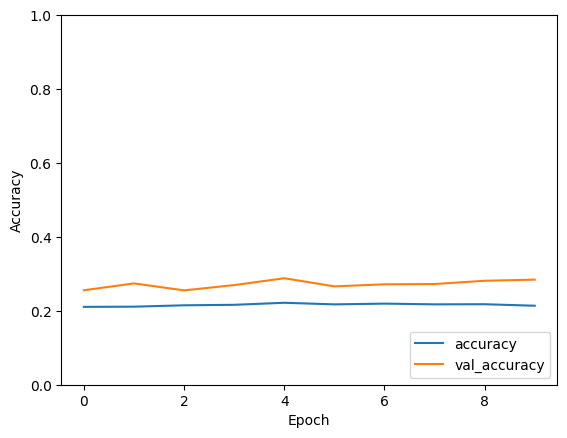

In [ ]:
history = model.fit(train_generator, epochs=10, validation_data=test_generator)

# Plotting the training and validation accuracy
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()


#evaluate model on test dataset

In [ ]:
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test accuracy: {test_acc:.4f}")


340/340 ━━━━━━━━━━━━━━━━━━━━ 30s 88ms/step - accuracy: 0.2733 - loss: 2.6803
Test accuracy: 0.2843


In [ ]:
model.save('restnet_omniplant_model.h5')  # Save the full model


#predictions

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Load and preprocess a single image
img_path = '/path/to/test_image.jpg'
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)  # Convert the image to a numpy array
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array /= 255.0  # Rescale the image

# Predict
prediction = model.predict(img_array)
predicted_class = np.argmax(prediction, axis=1)
print(f"Predicted class: {predicted_class}")


FileNotFoundError: [Errno 2] No such file or directory: '/path/to/test_image.jpg'

#evaluate

340/340 ━━━━━━━━━━━━━━━━━━━━ 49s 120ms/step
F1 Score: 0.0443
Recall: 0.0769
Classification Report:
                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.00      0.00      0.00       126
                                 Apple___Black_rot       0.00      0.00      0.00       125
                          Apple___Cedar_apple_rust       0.00      0.00      0.00        55
                                   Apple___healthy       0.00      0.00      0.00       329
                               Blueberry___healthy       0.06      0.01      0.01       301
          Cherry_(including_sour)___Powdery_mildew       0.00      0.00      0.00       211
                 Cherry_(including_sour)___healthy       0.00      0.00      0.00       171
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.00      0.00      0.00       103
                       Corn_(maize)___Common_rust_       0.00      0.00 

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


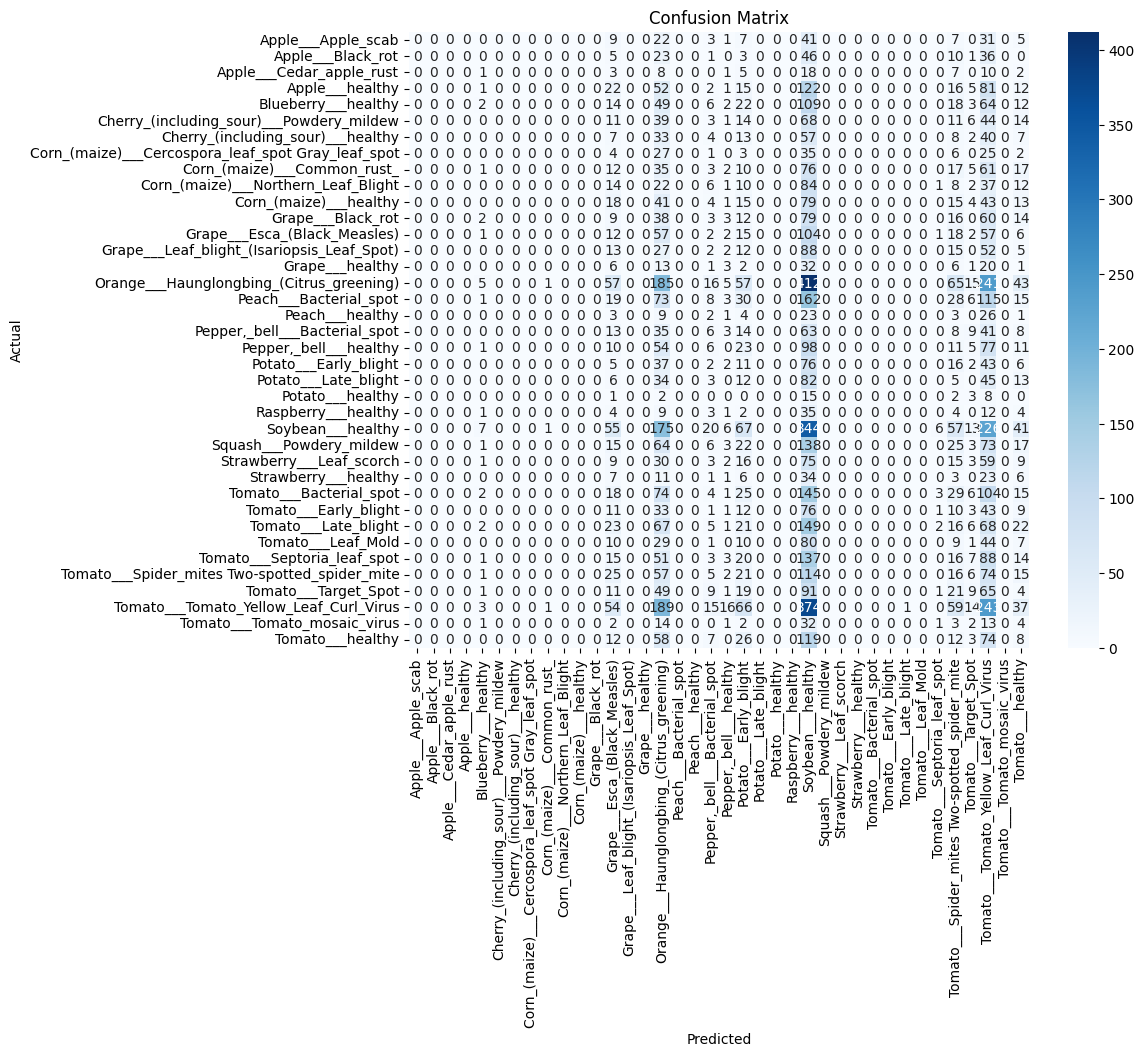

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score, recall_score
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Extract true labels from the test set
test_labels = test_generator.classes  # This assigns actual labels to test_labels

# Step 2: Get predictions from the model
predictions = model.predict(test_generator)  # Model predictions
predicted_classes = np.argmax(predictions, axis=1)  # Convert probabilities to class indices

# Step 3: Calculate F1 Score and Recall
f1 = f1_score(test_labels, predicted_classes, average='weighted')
recall = recall_score(test_labels, predicted_classes, average='weighted')

print(f"F1 Score: {f1:.4f}")
print(f"Recall: {recall:.4f}")

# Step 4: Display Classification Report
report = classification_report(test_labels, predicted_classes, target_names=test_generator.class_indices.keys())
print("Classification Report:")
print(report)

# Step 5: Compute and Plot Confusion Matrix
conf_matrix = confusion_matrix(test_labels, predicted_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=test_generator.class_indices.keys(),
            yticklabels=test_generator.class_indices.keys())
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [ ]:
# F1 Score and Recall
f1 = f1_score(test_labels, predicted_classes, average='weighted')  # Weighted F1 score for multi-class
recall = recall_score(test_labels, predicted_classes, average='weighted')  # Weighted Recall for multi-class

print(f"F1 Score: {f1:.4f}")
print(f"Recall: {recall:.4f}")


F1 Score: 0.0443
Recall: 0.0769


# EfficientNetB0

In [ ]:
import os
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import cv2
import shutil
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [ ]:
# Paths for the dataset
train_path = "/content/plantvillage dataset/train"
test_path = "/content/plantvillage dataset/test"

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_path, target_size=(224, 224), batch_size=32, class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    test_path, target_size=(224, 224), batch_size=32, class_mode='categorical')


Found 43429 images belonging to 38 classes.
Found 10876 images belonging to 38 classes.


In [ ]:
# Load EfficientNetB0 Model
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [ ]:

for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.3)(x)
output_layer = Dense(len(class_labels), activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output_layer)
model.summary()


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_6             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling_2 (Rescaling)   │ (None, 224, 224, 3)    │              0 │ input_layer_6[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ normalization_1           │ (None, 224, 224, 3)    │              7 │ rescaling_2[0][0]      │
│ (Normalization)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling_3 (Rescaling)   │ (None, 224, 224, 3)    │              0 │ normalization_1[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv_pad             │ (None, 225, 225, 3)    │              0 │ rescaling_3[0][0]      │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv (Conv2D)        │ (None, 112, 112, 32)   │            864 │ stem_conv_pad[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_bn                   │ (None, 112, 112, 32)   │            128 │ stem_conv[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_activation           │ (None, 112, 112, 32)   │              0 │ stem_bn[0][0]          │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_dwconv            │ (None, 112, 112, 32)   │            288 │ stem_activation[0][0]  │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_bn                │ (None, 112, 112, 32)   │            128 │ block1a_dwconv[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_activation        │ (None, 112, 112, 32)   │              0 │ block1a_bn[0][0]       │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_squeeze        │ (None, 32)             │              0 │ block1a_activation[0]… │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_reshape        │ (None, 1, 1, 32)       │              0 │ block1a_se_squeeze[0]… │
│ (Reshape)                 │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_reduce         │ (None, 1, 1, 8)        │            264 │ block1a_se_reshape[0]… │
│ (Conv2D)                  │                        │                │                        │
├──────────────────────

 Total params: 4,846,537 (18.49 MB)

 Trainable params: 796,966 (3.04 MB)

 Non-trainable params: 4,049,571 (15.45 MB)

In [ ]:
# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_generator, validation_data=test_generator, epochs=10)

Epoch 1/10
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 125s 75ms/step - accuracy: 0.0958 - loss: 3.4163 - val_accuracy: 0.1013 - val_loss: 3.3567
Epoch 2/10
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 75s 55ms/step - accuracy: 0.0987 - loss: 3.3734 - val_accuracy: 0.1013 - val_loss: 3.3520
Epoch 3/10
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 71s 52ms/step - accuracy: 0.0985 - loss: 3.3697 - val_accuracy: 0.1013 - val_loss: 3.3479
Epoch 4/10
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 83s 61ms/step - accuracy: 0.0976 - loss: 3.3610 - val_accuracy: 0.0986 - val_loss: 3.3510
Epoch 5/10
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 132s 54ms/step - accuracy: 0.0982 - loss: 3.3607 - val_accuracy: 0.1013 - val_loss: 3.3465
Epoch 6/10
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 73s 54ms/step - accuracy: 0.0981 - loss: 3.3580 - val_accuracy: 0.0986 - val_loss: 3.3478
Epoch 7/10
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 88s 59ms/step - accuracy: 0.0995 - loss: 3.3549 - val_accuracy: 0.1013 - val_loss: 3.3486
Epoch 8/10
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 76s 56ms/step - accuracy: 0.1005

In [ ]:
# Test Predictions
test_images, test_labels = next(test_generator)
predictions = model.predict(test_images)
predicted_classes = np.argmax(predictions, axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


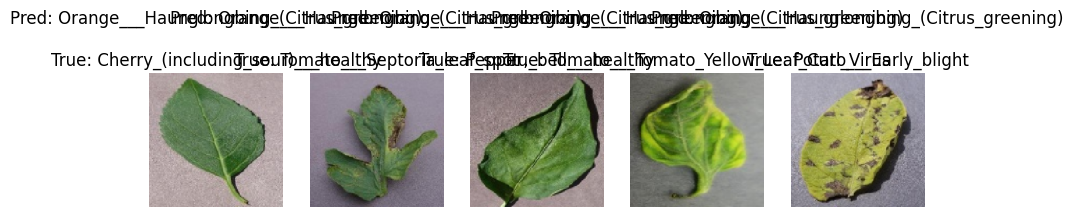

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(test_images[i])
    plt.title(f"Pred: {class_labels[predicted_classes[i]]}\n\nTrue: {class_labels[np.argmax(test_labels[i])]}" )
    plt.axis('off')
plt.show()


Classification Report:
                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.00      0.00      0.00         1
                                 Apple___Black_rot       0.00      0.00      0.00         2
                          Apple___Cedar_apple_rust       0.00      0.00      0.00         1
                                   Apple___healthy       0.00      0.00      0.00         2
                               Blueberry___healthy       0.00      0.00      0.00         2
          Cherry_(including_sour)___Powdery_mildew       0.00      0.00      0.00         1
                 Cherry_(including_sour)___healthy       0.06      1.00      0.12         2
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.00      0.00      0.00         2
                       Corn_(maize)___Common_rust_       0.00      0.00      0.00         1
               Corn_(maize)___Northern_Leaf_Blight      

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


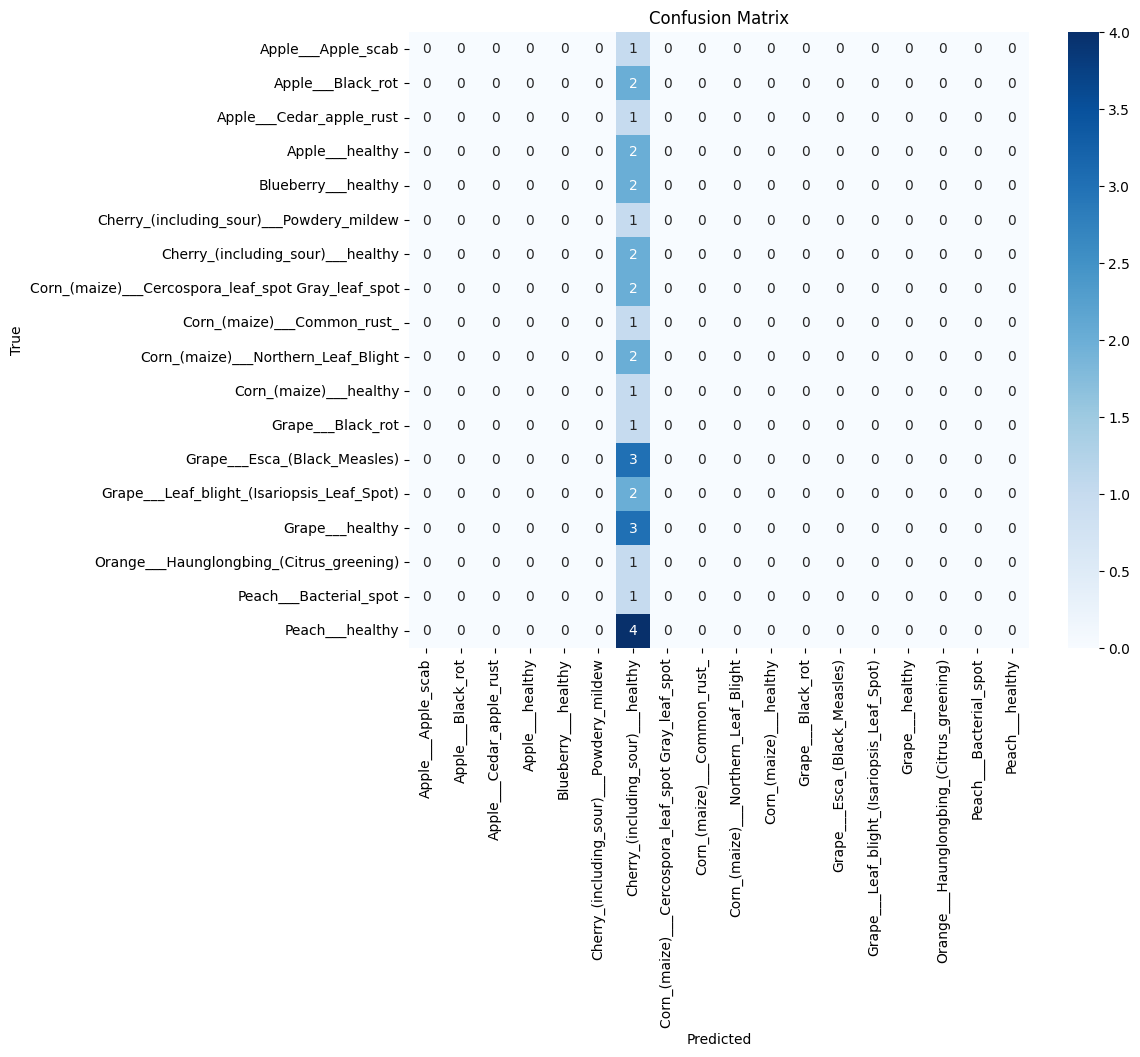

In [ ]:
# Compute Recall and Confusion Matrix
y_true = np.argmax(test_labels, axis=1)
y_pred = predicted_classes

# Ensure class_labels matches the actual number of classes in the dataset
num_classes = len(np.unique(y_true))  # Get the actual number of unique test labels
corrected_class_labels = class_labels[:num_classes]  # Adjust label list to match predictions

print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=corrected_class_labels))

# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=corrected_class_labels, yticklabels=corrected_class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
